(Pearson's correlation coefficient, 2-tailed p-value) = (0.5238618336023664, 0.0029668886762983285)


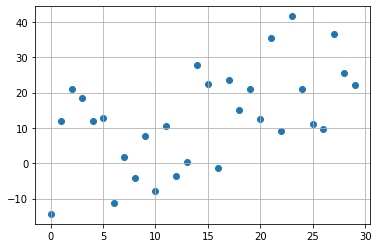

data: x and y
t = 3.25429, df = 28, p-value = 0.00297
z value: 0.5816474970585078
sigma value (i.e standard error): 0.19245008972987526
  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05
95 percent confidence interval:[0.20165034 0.74376023]
PearsonCorellation: 0.5238618336023664


In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random as r

def cortest(x,y):
    assert len(x)==len(y)
    
    #t value
    cor_pearson = stats.pearsonr(x, y)[0]
    df = len(x)-2
    
    t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
    p_val = stats.t.sf(np.abs(t), df)*2
    print("data: x and y")
    print(f"t = {round(t,5)}, df = {df}, p-value = {p_val:.5f}")

    # Use the Fisher transformation to get z
    z = np.arctanh(cor_pearson)
    print("z value: {}".format(z))

    # And, the sigma value i.e standard error
    sigma = (1/((len(x)-3)**0.5))
    print("sigma value (i.e standard error): {}".format(sigma))

    # Get normal 95% interval probability density function for normal continuous random variable apply two-sided conditional formula
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    
    #Finally take hyperbolic tangent to get interval values for 95%
    interval = np.tanh(cint)
    
    if p_val < 0.05:
        print("  Отклоняем 0 гипотезу в пользу альтернативной: коэффициент корелляции в генеральной совокупности != 0. p_val < 0.05")
    else:
        print("  Не можем отклонить 0 гипотезу: коэффициент корелляции в генеральной совокупности = 0. p_val >= 0.05")
        
    print(f"95 percent confidence interval:{interval}")
    print(f"PearsonCorellation: {cor_pearson}")

# ==================================================================  
# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res
    
# ==================================================================    

# создаем пару x и y

x = np.array(range(30))
y = randomize(x, 0.7) # чем ближе к 0 значение, тем менее случайными будут значения y и выше будет корелляция

n = 30 # чем меньшее кол-во точек берем в пример, тем менее уверенные значения получаем
a,b = x[:n],y[:n]    
pearson_corr = stats.pearsonr(a, b)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# cтроим scatter plot
plt.scatter(a,b)
plt.grid()
plt.show()

cortest(a,b)